Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.

##### Hipótesis
Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

¿Hay diferencias entre los paises en los ataques a hombres y mujeres?

¿Cuáles son las edades que más sufren ataques?

Independientemente de la edad, sufren los hombres más ataques que las mujeres?

¿En qué mes ocurren más ataques?

¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

¿Cómo han evolucionado los ataques a lo largo del tiempo?

De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:
variable
¿Está limpia?

age
✔️ la limpiamos en el pair de Limpieza II

species
✔️ la limpiamos en el pair de Limpieza II

country
✔️ la limpiamos en el pair de Limpieza II

fatal
✔️ la limpiamos en el pair de Pandas V

year
✔️ es una columna de tipo float deberíamos convertirla a integer

sex
✔️ la limpiamos en el pair de Pandas V

fecha
✔️ la limpiamos en el pair de Pandas V


##### Objetivos
En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

pd.options.display.max_rows=None
plt.rcParams['figure.figsize']= (15,12)

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
* ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.


In [2]:
df= pd.read_csv('datos/attacks_limpieza_2.csv', index_col = 0)
df.head(1)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,date,month,fatal_y/n,sex_m_f
0,2018.06.25,2018,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,18h00,white shark,http://sharkattackfile.net/spreadsheets/pdf_di...,25-Jun-2018,Jun,N,F


In [3]:
# ¿Tenemos nulos?
df.isnull().sum()

case_number      0
year             0
type             0
country         10
area            46
location        51
activity        31
name             9
age            158
time           160
species_         0
href             0
date             0
month          181
fatal_y/n       99
sex_m_f          0
dtype: int64

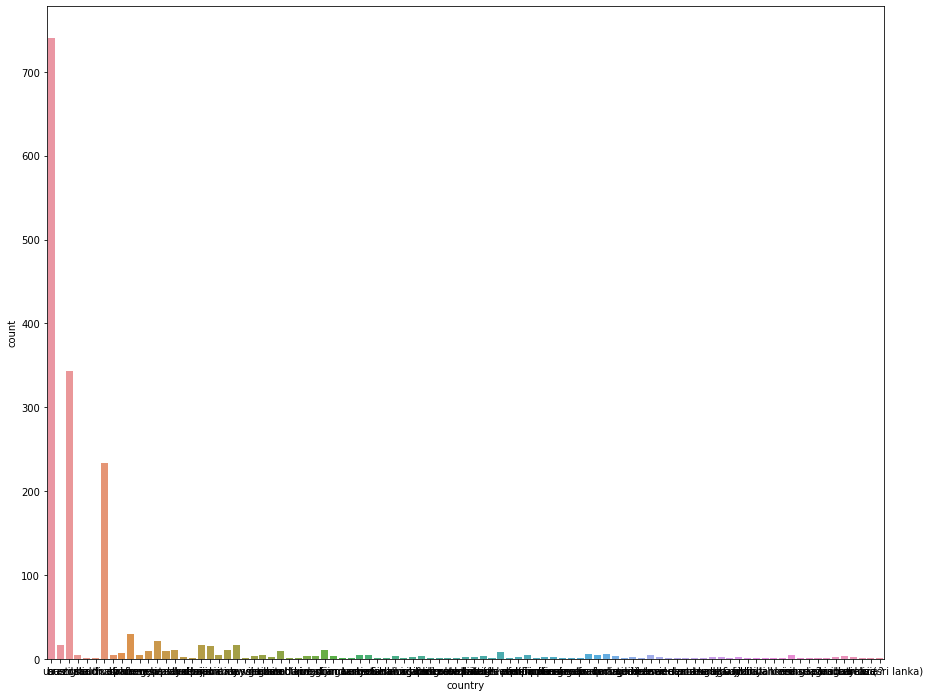

In [4]:
# En country no hay nulos
sns.countplot(x= 'country', data = df);

In [5]:
# No es fácil ver la información
#  Filtramos por los 10 países con más ataques
df10max = df.stb.freq(['country'], thresh = 87)
df10max

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,44.584838,741,44.584838
1,australia,343,20.637786,1084,65.222623
2,south africa,234,14.079422,1318,79.302046
3,bahamas,29,1.744886,1347,81.046931
4,new zealand,21,1.263538,1368,82.310469
5,reunion,17,1.022864,1385,83.333333
6,papua new guinea,16,0.962696,1401,84.296029
7,brazil,16,0.962696,1417,85.258724
8,mexico,15,0.902527,1432,86.161252
9,italy,11,0.661853,1443,86.823105


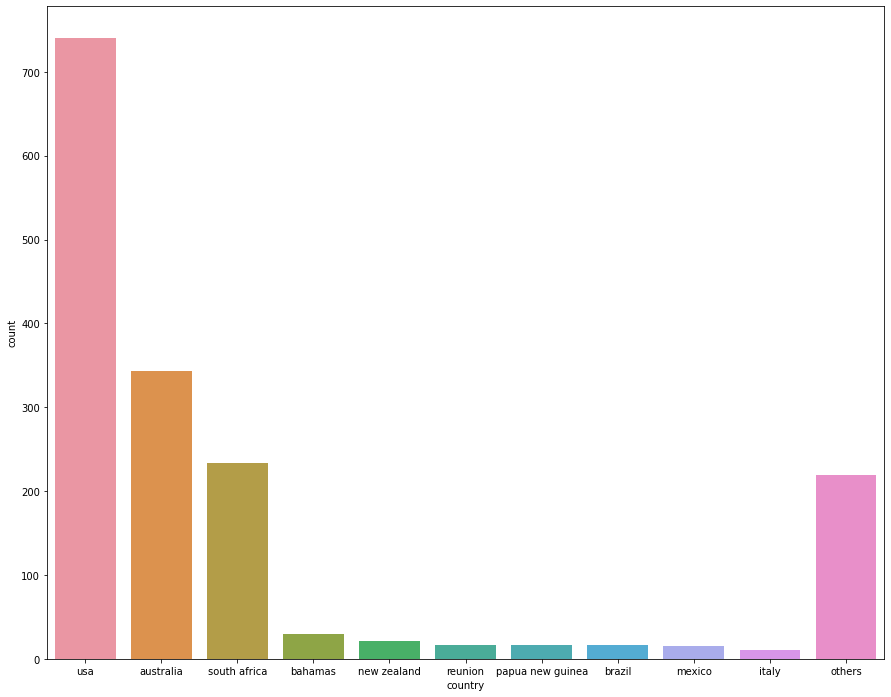

In [6]:
# Repetimos gráfica, ahora tiene que ser un barplot

sns.barplot(x='country', y='count', data=df10max);

> Vemos que los tres países en los que hay más ataques reportados son USA, Australia y South África, siendo en USA donde claramente hay más casos reportados

* Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?


In [7]:
# Volvemos a filtrar el dataframe, esta vez utilizaremos los nombres de los 10 más frecuentes obtenidos en df10max
df10max['country'].values

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'papua new guinea', 'brazil', 'mexico', 'italy',
       'others'], dtype=object)

In [8]:
# Tenemos que retirar el 'others'
lista_paises = list(df10max['country'].values)
lista_paises.pop()

'others'

In [9]:
print(lista_paises)

['usa', 'australia', 'south africa', 'bahamas', 'new zealand', 'reunion', 'papua new guinea', 'brazil', 'mexico', 'italy']


In [10]:
df10 = df[df['country'].isin(lista_paises)]
# Comprobamos
df10['country'].unique()

array(['usa', 'brazil', 'australia', 'south africa', 'bahamas',
       'new zealand', 'reunion', 'mexico', 'italy', 'papua new guinea'],
      dtype=object)

In [11]:
df10.head(1)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,date,month,fatal_y/n,sex_m_f
0,2018.06.25,2018,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,18h00,white shark,http://sharkattackfile.net/spreadsheets/pdf_di...,25-Jun-2018,Jun,N,F


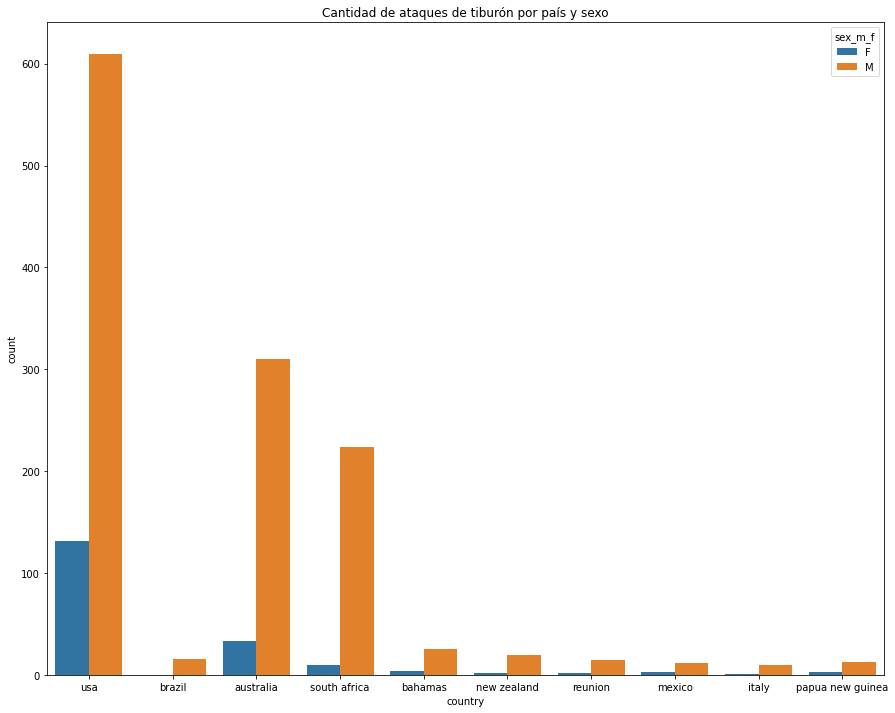

In [20]:
sns.countplot(x='country', data= df10, hue= 'sex_m_f')
plt.title('Cantidad de ataques de tiburón por país y sexo');

> Vemos que sí hay mucho contraste entre el numero de casos entre hombres y mujeres.

* ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.


In [13]:
df10.age.unique()

array([57., 18., 15., 32., 60., 33., 19., 25., 10., 69., 55., 35., 20.,
       54., 31., 40., 37., 13., 34., 50., 46., 48., 17., 28., 65., 73.,
       58., 36., 51., 21., 61., 59., 42.,  6., 27., 29., 22., 23., 39.,
       12., 11., 71., 43.,  9., 44., 14., 62., 52., 38., 68., 16., 47.,
       63., 26., 70., 41., 53.,  7., 66., 30., 24., 45., 74., 64.,  8.,
       56., 49., nan, 77., 84.,  5., 67.])

In [17]:
# Añadimos una columna con los intervalos
df10['intervalos_age'] = pd.cut(df10.age, bins= [0,10,20,30,40,50,60,70,80,90])

/tmp/ipykernel_753/4074257242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['intervalos_age'] = pd.cut(df10.age, bins= [0,10,20,30,40,50,60,70,80,90])


In [18]:
df10['intervalos_age'].unique()

[(50.0, 60.0], (10.0, 20.0], (30.0, 40.0], (20.0, 30.0], (0.0, 10.0], (60.0, 70.0], (40.0, 50.0], (70.0, 80.0], NaN, (80.0, 90.0]]
Categories (9, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]

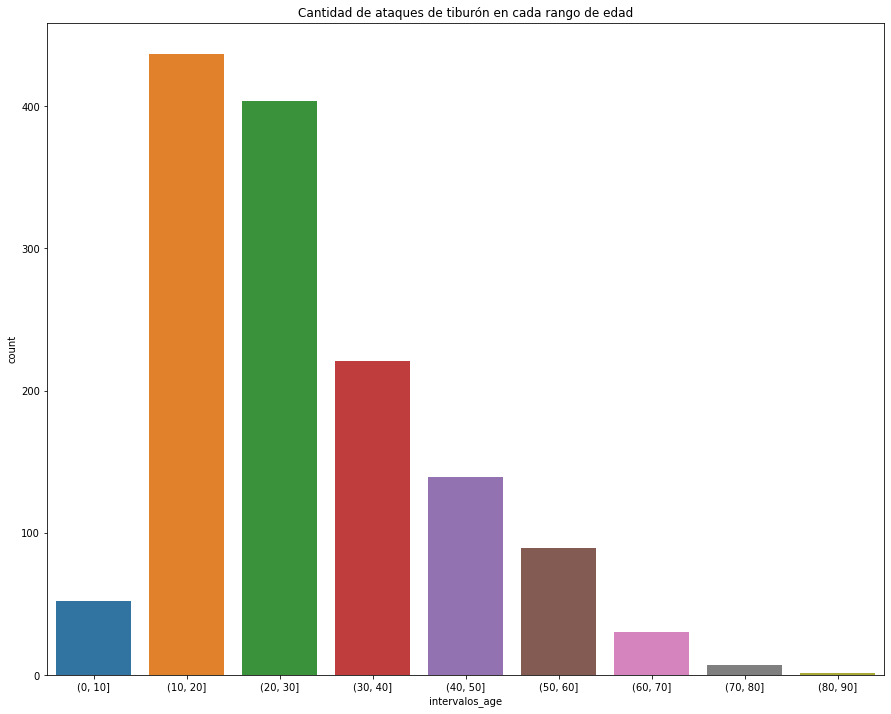

In [21]:
sns.countplot(x=df10['intervalos_age'])
plt.title('Cantidad de ataques de tiburón en cada rango de edad');

>* La mayor parte de los casos registrados son de personas muy jóvenes.
>
>* Los rangos de edad más afectados son de 10 a 20 años y de 20 a 30 años.

* Ataques entre sexos, ¿hay diferencia?


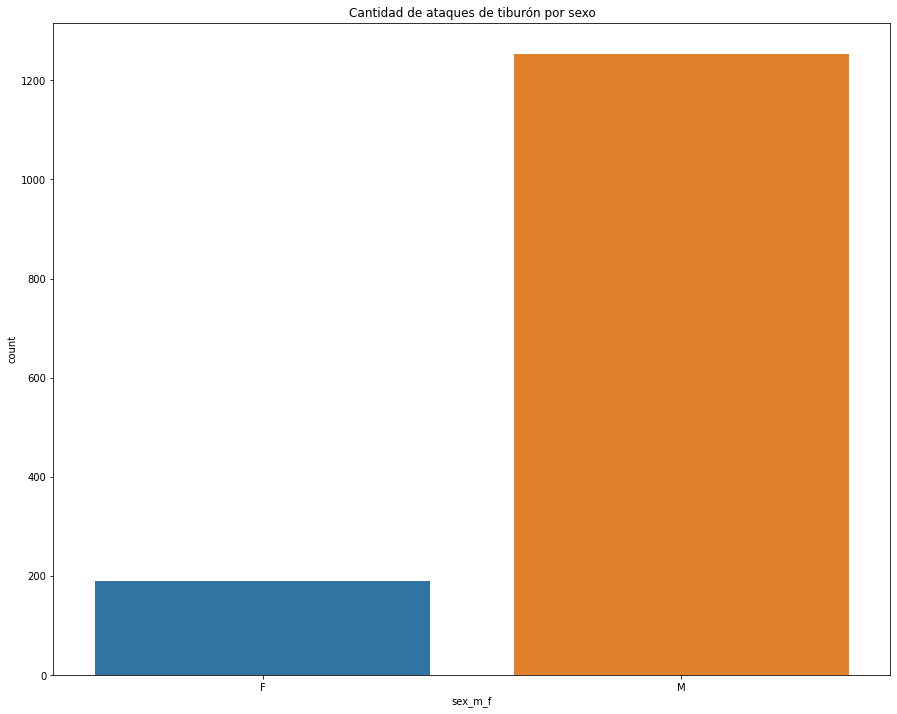

In [23]:
sns.countplot(x=df10['sex_m_f'])
plt.title('Cantidad de ataques de tiburón por sexo');

> Con diferencia los hombres sufren y reportan muchos más ataques de tiburones que las mujeres

* ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [ ]:
# Como vimos en el primer análisis exploratorio, nuestra columna 'year' tiene la mayoría de casos en el año 0
# Vamos a filtar nuestros datos para que nos muestren los ataques a partir del año 1900

In [26]:
dfyear = df10[df10['year']>=1900]
dfyear['year'].value_counts()

2015    63
2012    54
2007    52
2002    51
2003    43
2013    43
2005    42
2006    38
2004    38
2008    37
2009    35
2014    34
2016    31
2011    31
2000    30
2001    29
2017    27
2010    26
1999    24
1992    22
1961    22
1998    21
1962    21
1996    20
1995    20
1966    19
1993    19
1989    18
1963    18
1997    18
1991    16
1994    16
1964    15
1959    15
1960    14
2018    14
1984    14
1986    14
1988    14
1982    13
1981    13
1983    13
1985    13
1990    13
1958    12
1975    12
1980    11
1987    11
1967    11
1974    10
1968     9
1965     8
1971     8
1976     8
1957     7
1969     5
1937     5
1947     5
1951     5
1942     5
1977     5
1979     4
1956     4
1955     4
1922     4
1936     4
1972     4
1950     4
1949     4
1940     4
1934     4
1929     3
1978     3
1946     3
1927     3
1973     3
1926     3
1953     3
1935     3
1928     2
1930     2
1931     2
1932     2
1925     2
1938     2
1939     2
1941     2
1952     2
1954     2
1970     1
1943     1

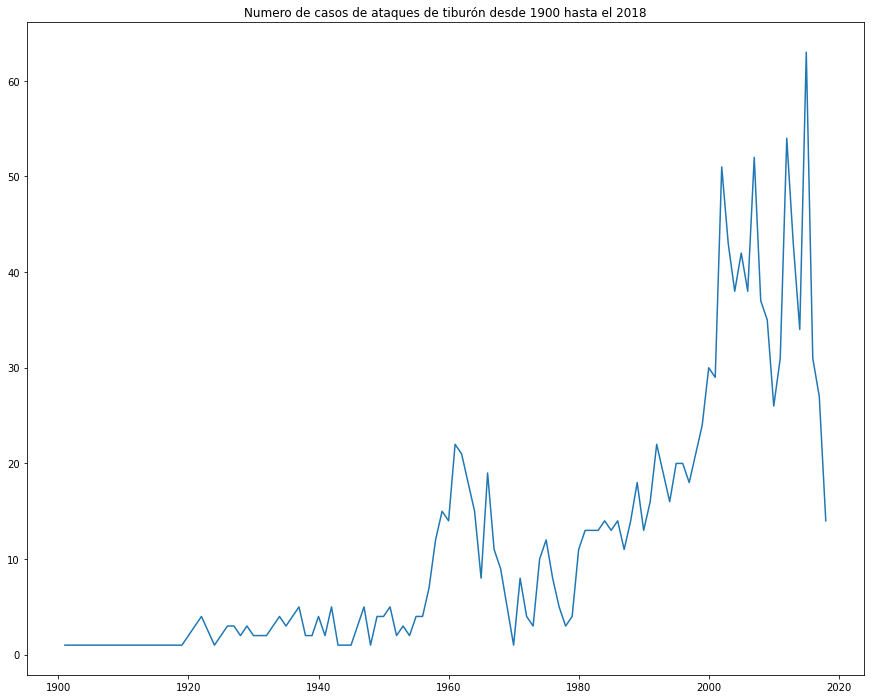

In [30]:
# Con este filtrado hacemos una gráfica de los ataques por año y por mes desde el 1900 hasta el 2018
# Utilizamos el value_counts para graficarlo
sns.lineplot(x=dfyear['year'].value_counts().index , y = dfyear['year'].value_counts().values)
plt.title('Numero de casos de ataques de tiburón desde 1900 hasta el 2018');

> Cabe destacar que hay más casos reportados en la primera y segunda década de los años 2000

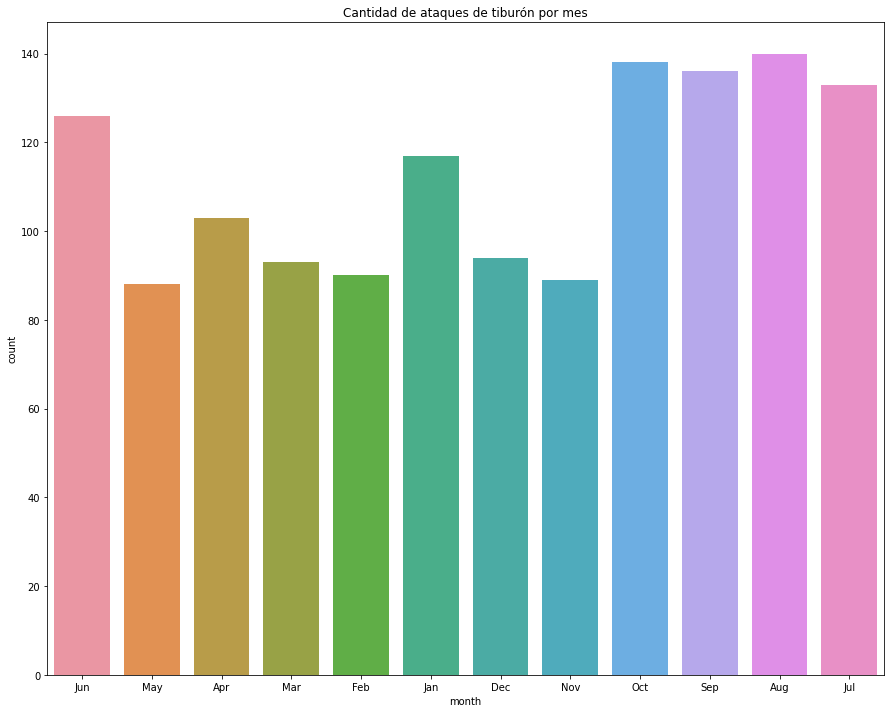

In [31]:
sns.countplot(x=dfyear['month'])
plt.title('Cantidad de ataques de tiburón por mes');

> * Los meses de verano son los más frecuentes para que ocurran ataques de tiburón
> * Sin embargo, el número de ataques está bastante repartido a lo largo del año
> * Además, de entre los meses de invierno en el hemisferio norte, destaca el mes de Enero. Pensamos que esto puede ser porque los lugares en los que ocurren los ataques puedan tener un clima parecido a lo largo de todo el año.